In [15]:
import pandas as pd
pd.options.display.max_columns = 100

In [16]:
muts_df = pd.read_pickle("./data/SER_df.pkl")
len(muts_df)

27

In [17]:
cond_cnt_d = {"none": 0}
feat_cnt = 0
for _, mut in muts_df.iterrows():
    for feat in mut["genetic features"]:
        feat_cnt += 1
        if len(feat["significantly associated conditions"]) > 0:
            for cond in feat["significantly associated conditions"]:
                if cond in cond_cnt_d.keys():
                    cond_cnt_d[cond] += 1
                else:
                    cond_cnt_d[cond] = 1
        else:
            cond_cnt_d["none"] += 1
            
cond_cnt_d

{'none': 8,
 'ΔsdaA ΔsdaB ΔtdcG ΔglyA': 18,
 'L-Serine': 18,
 '511145': 1,
 'M9': 1,
 'glucose(4)': 1}

,condition,mutated feature count,proportion
0,none,8.0,0.296296
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,18.0,0.666667
2,L-Serine,18.0,0.666667
3,511145,1.0,0.037037
4,M9,1.0,0.037037
5,glucose(4),1.0,0.037037


Text(0.5, 0, 'mutated feature count')

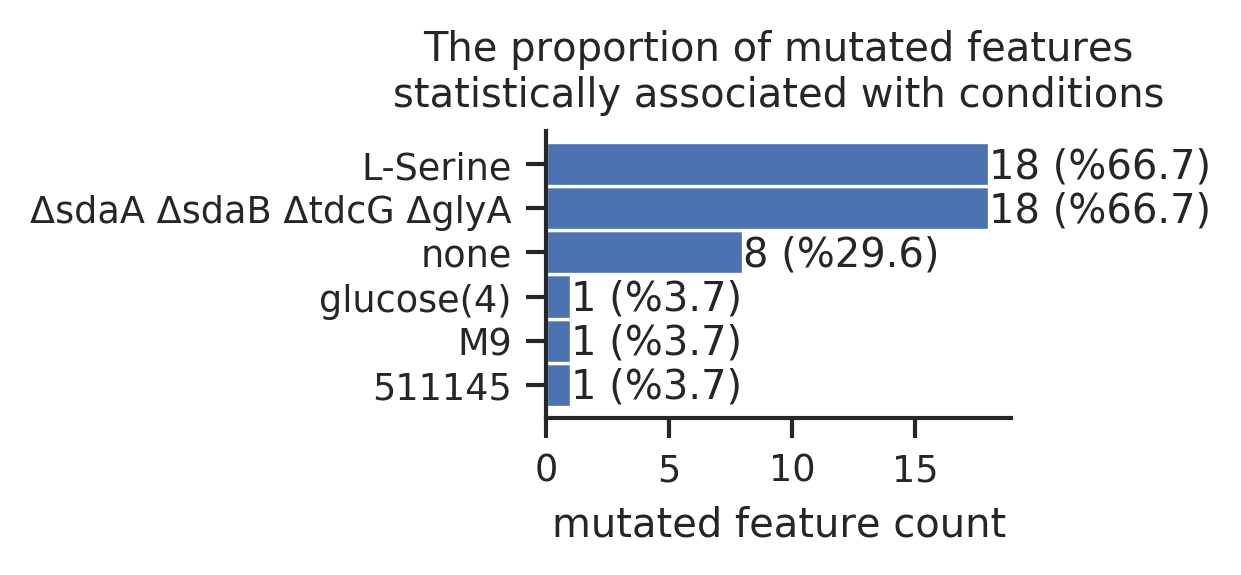

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")

cond_cnt_df = pd.DataFrame()
for key, val in cond_cnt_d.items():
    cond_cnt_df = cond_cnt_df.append({"condition": key, "mutated feature count": val, "proportion":val/feat_cnt}, ignore_index=True)
display(cond_cnt_df)

cond_cnt_df = cond_cnt_df.sort_values(by="mutated feature count", ascending=True)

ax = cond_cnt_df.plot.barh(
    y="mutated feature count",
    x="condition",
    color="#4C72B0",
    figsize=(2,1.265),
    width=1
)

cond_cnt_df = cond_cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cond_cnt_df.iterrows(): 
    s = str(int(r["mutated feature count"])) +' (%{0:.1f})'.format(r["proportion"] * 100)
    ax.text(r["mutated feature count"], i-0.3,  s)
sns.despine(ax=ax, top=True, right=True)
ax.set_title("The proportion of mutated features\nstatistically associated with conditions")
ax.get_legend().remove()
sns.despine(ax=ax, top=True, right=True)
ax.set_ylabel('')
ax.set_xlabel("mutated feature count")

In [19]:
import pickle
f = open("./data/signif_genetic_feat_cond_json.pkl", 'rb')   
signif_genomic_feat_cond_json = pickle.load(f)
signif_genomic_feat_cond_json[0:5]

[{'mutated features': 'abgB',
  'condition': '42 celsius',
  'odd ratio': 20.653169014084508,
  'p value': 0.005261992594522707},
 {'mutated features': 'ackA',
  'condition': 'Δpgi',
  'odd ratio': 18.16322314049587,
  'p value': 0.00672226482560556},
 {'mutated features': 'araA',
  'condition': 'KH2PO4(2)',
  'odd ratio': 9.455354734286486,
  'p value': 0.004949620283075594},
 {'mutated features': 'araA',
  'condition': 'MgSO4(3)',
  'odd ratio': 9.455354734286486,
  'p value': 0.004949620283075594},
 {'mutated features': 'araA',
  'condition': 'Δpts',
  'odd ratio': 97.39669421487604,
  'p value': 6.72477739422584e-06}]

In [20]:
def get_signif_mut_conds(feat_name):
    signif_mut_conds = []
    for signif_mut_cond in signif_genomic_feat_cond_json:
        if signif_mut_cond['mutated features'] == feat_name:
            signif_mut_conds.append(signif_mut_cond)
    return signif_mut_conds
    
    

cond_mut_feat_assoc_df = pd.DataFrame()
for _, mut in muts_df.iterrows():
    for feat in mut["genetic features"]:
        signif_mut_conds = get_signif_mut_conds(feat["name"])
        for d in signif_mut_conds:
            cond_mut_feat_assoc_df = cond_mut_feat_assoc_df.append(d, ignore_index=True)

cond_mut_feat_assoc_df.head()

,condition,mutated features,odd ratio,p value
0,L-Serine,thrA,73.618750,0.000015
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,thrA,73.618750,0.000015
2,L-Serine,aroP,170.139423,0.006840
3,ΔsdaA ΔsdaB ΔtdcG ΔglyA,aroP,170.139423,0.006840
4,L-Serine,yodD,170.139423,0.006840


In [21]:
ser_cond_mut_feat_assoc_df = cond_mut_feat_assoc_df[cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())].copy()
ser_cond_mut_feat_assoc_df["mutated features"] = ser_cond_mut_feat_assoc_df["mutated features"].apply(lambda f: f.replace("attenuator terminator", "att term"))
ser_cond_mut_feat_assoc_df["mutated features"] = ser_cond_mut_feat_assoc_df["mutated features"].apply(lambda f: f.replace("terminator", "term"))

cross_counts_df = pd.crosstab(
    ser_cond_mut_feat_assoc_df["mutated features"],
    ser_cond_mut_feat_assoc_df["condition"]
)

cross_counts_df

condition,511145,L-Serine,M9,glucose(4),ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,,,,
argP,0,1,0,0,1
aroP,0,1,0,0,1
dapA/gcvR,0,2,0,0,2
eno,0,1,0,0,1
frc,0,1,0,0,1
gcvA/gcvB,0,1,0,0,1
gshA,0,1,0,0,1
lamB,0,1,0,0,1
rpe,0,1,0,0,1


In [22]:
bin_df = cross_counts_df.copy()
for ir, r in bin_df.iterrows():
    for ic, c in r.items():
        if bin_df.loc[ir, ic] > 0:
            bin_df.loc[ir, ic] = 1
display(bin_df)

condition,511145,L-Serine,M9,glucose(4),ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,,,,
argP,0,1,0,0,1
aroP,0,1,0,0,1
dapA/gcvR,0,1,0,0,1
eno,0,1,0,0,1
frc,0,1,0,0,1
gcvA/gcvB,0,1,0,0,1
gshA,0,1,0,0,1
lamB,0,1,0,0,1
rpe,0,1,0,0,1


Text(0.5, 43.99999999999987, '')

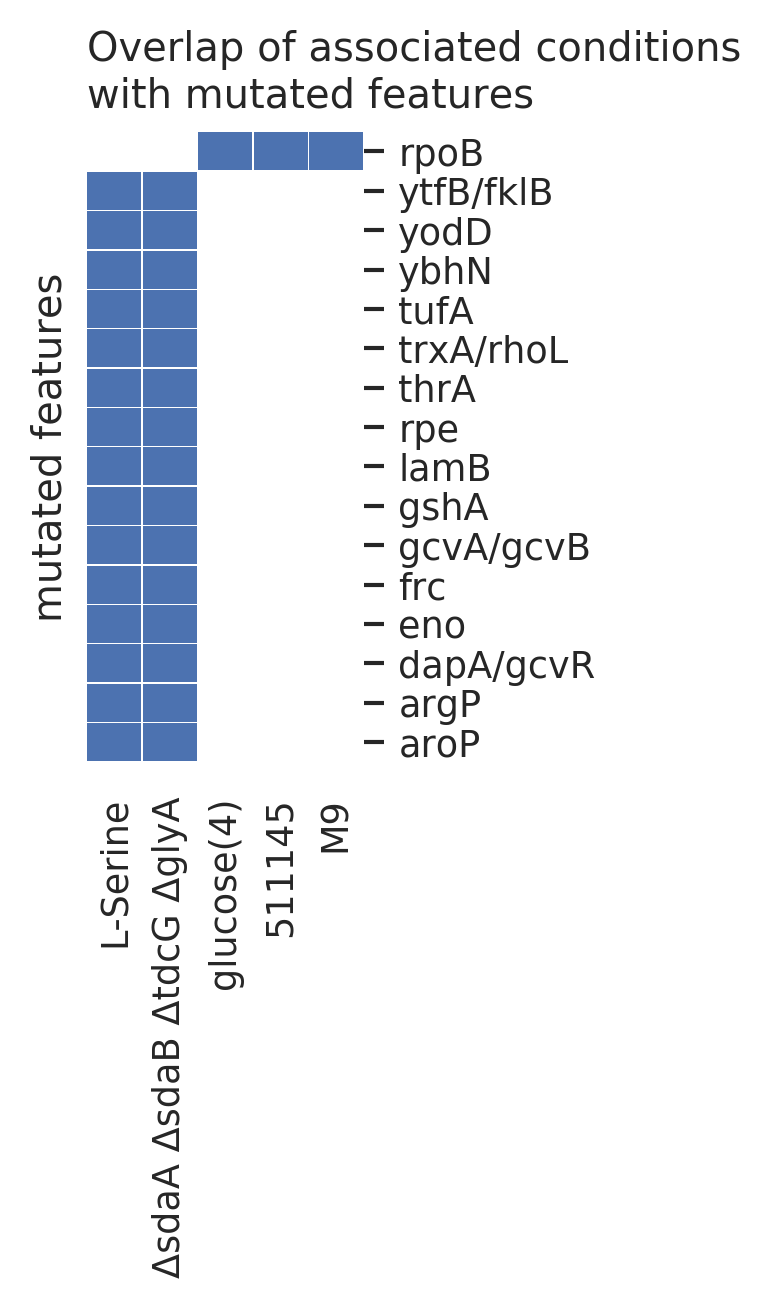

In [35]:
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")

from matplotlib.colors import LinearSegmentedColormap
myColors = ('#FFFFFF', "#4C72B0")
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

g = sns.clustermap(
    bin_df,
    linewidths=0.1,
    cmap=cmap,
#     xticklabels=False,
#     yticklabels=False,
    figsize=(1.5,3.5)
)
g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
ax = g.ax_heatmap
g.ax_heatmap.set_title(
    "Overlap of associated conditions\nwith mutated features",
    loc='left'
#     y=1.1
)
# ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position("left")
ax.set_xlabel('')

In [36]:
# only want to plot genetic targets that have significant convergences
# I only want to look at mutated targets that have significant convergence
signif_gen_targ_s = set()
for _, r in muts_df.iterrows():
    for reg in r["genetic features"]:
        if reg["significant"]:
            signif_gen_targ_s.add(reg["name"])
signif_gen_targ_s

{'dapA/gcvR', 'thrA'}

In [37]:
odds_df = bin_df.copy()
for feat, r in bin_df.iterrows():
    for cond, c in r.items():
        if bin_df.loc[feat, cond] > 0:
            odd_ratio = 0
            df = cond_mut_feat_assoc_df[
                (cond_mut_feat_assoc_df["condition"]==cond)
                & (cond_mut_feat_assoc_df["mutated features"]==feat)]["odd ratio"]
            if len(df):
                odd_ratio = df.iloc[0]
            odds_df.loc[feat, cond] = odd_ratio
            
odds_df = odds_df[odds_df.index.isin(signif_gen_targ_s)]
odds_df.index = '*'+odds_df.index
odds_df

condition,511145,L-Serine,M9,glucose(4),ΔsdaA ΔsdaB ΔtdcG ΔglyA
*dapA/gcvR,0.0,176.90500,0.0,0.0,176.90500
*thrA,0.0,73.61875,0.0,0.0,73.61875


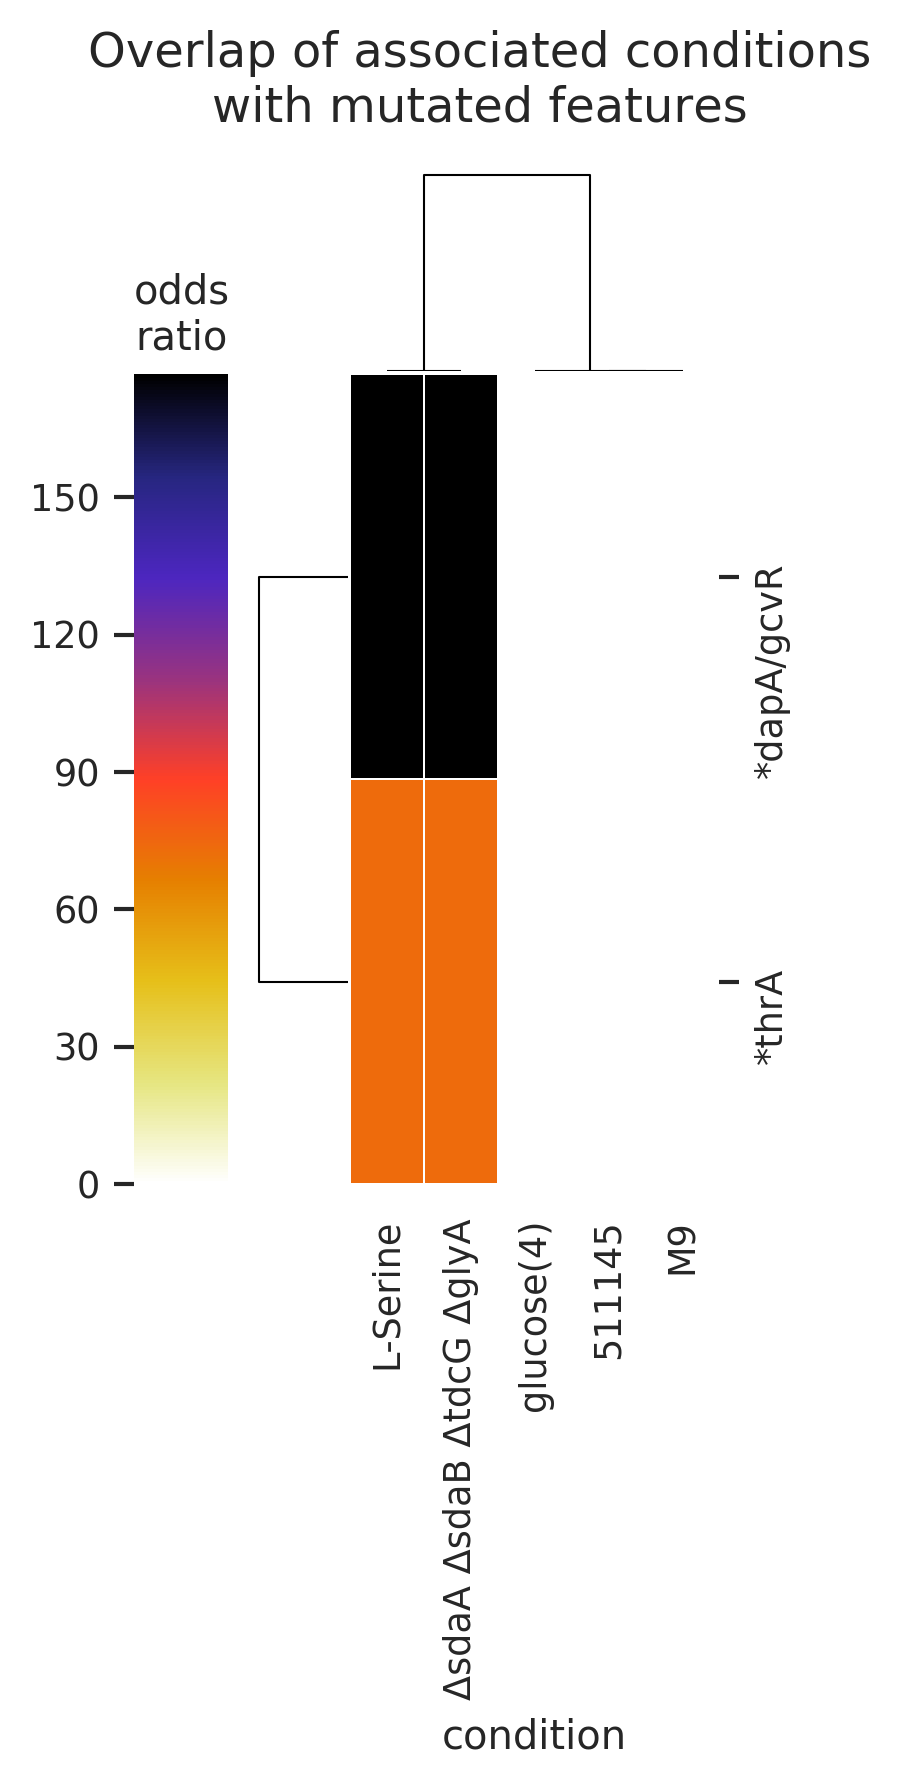

In [38]:
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")

g = sns.clustermap(
    odds_df,
    linewidths=0.1,
    cmap="CMRmap_r",
#     xticklabels=False,
#     yticklabels=False,
    figsize=(2,4.5)
)
# g.cax.set_visible(False)
# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)
# ax = g.ax_heatmap
g.fig.suptitle("Overlap of associated conditions\nwith mutated features")
g.cax.set_title("odds\nratio")
g.cax.yaxis.set_ticks_position("left")
# g.ax_heatmap.set_title(
#     "Overlap of associated conditions\nwith mutated features",
# #     loc='top'
# )
# ax.yaxis.set_ticks_position('left')
# ax.yaxis.set_label_position("left")
ax.set_xlabel('')
dendro_box = g.ax_row_dendrogram.get_position()
dendro_box.x0-=0.2
dendro_box.x1-=0.2
g.cax.set_position(dendro_box)

In [24]:
# Just wanting to see what mutated targets from this experiment are being associated with across ALEdb.
cond_mut_feat_assoc_df[~((cond_mut_feat_assoc_df["condition"]=="L-Serine") | (cond_mut_feat_assoc_df["condition"]=="ΔsdaA ΔsdaB ΔtdcG ΔglyA"))]

,condition,mutated features,odd ratio,p value
10,511145,rpoB,2.226029,5.793008e-08
11,KH2PO4(2),rpoB,7.826283,9.521423e-20
12,M9,rpoB,2.226029,5.793008e-08
13,MgSO4(3),rpoB,7.826283,9.521423e-20
14,U-13C glucose(2),rpoB,9.238179,3.598931e-04
15,glucose(4),rpoB,2.493418,1.056379e-07
16,Δgnd,rpoB,11.069930,7.782864e-04
17,Δpgi,rpoB,5.249048,2.383582e-08
18,Δpts,rpoB,9.834755,2.776245e-04
19,Δsdh,rpoB,12.818918,4.791214e-04


TODO: The below is from genomic feature associations and needs to be refactored for genetic feature association.

In [25]:
KEY_MUT_FEATS = ["gcvB gcvA TFBS", "gcvAp", "gcvB", "cycA", "gcvRp", "thrA", "rho", "rhoLp", "lrp", "lrpp"]
display(
    len(KEY_MUT_FEATS),
    len(set(KEY_MUT_FEATS) & set(cond_mut_feat_assoc_df['mutated features'])),
    set(KEY_MUT_FEATS) - set(cond_mut_feat_assoc_df['mutated features'])
)

10

2

{'cycA', 'gcvAp', 'gcvB', 'gcvB gcvA TFBS', 'gcvRp', 'lrp', 'lrpp', 'rhoLp'}

In [26]:
key_mut_feat_df = cond_mut_feat_assoc_df[
    cond_mut_feat_assoc_df["mutated features"].isin(KEY_MUT_FEATS)
    & cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())  # only considering conditions to local experiment
]
key_mut_feat_df = key_mut_feat_df.drop_duplicates()
key_mut_feat_df

,condition,mutated features,odd ratio,p value
0,L-Serine,thrA,73.61875,0.000015
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,thrA,73.61875,0.000015


Clearly, each mutated target associated with L-serine is also associated with the starting strain mutations. Therefore going to build the plot by simplifying and only considering the data associated with one of the two conditions.  
TODO: future implementations should check if this linkage changes and there is a mutated target with only one of the two associations.

In [27]:
ser_key_mut_feat_df = key_mut_feat_df[key_mut_feat_df.condition=="L-Serine"]
ser_key_mut_feat_df = ser_key_mut_feat_df.drop_duplicates()
ser_key_mut_feat_df

,condition,mutated features,odd ratio,p value
0,L-Serine,thrA,73.61875,0.000015


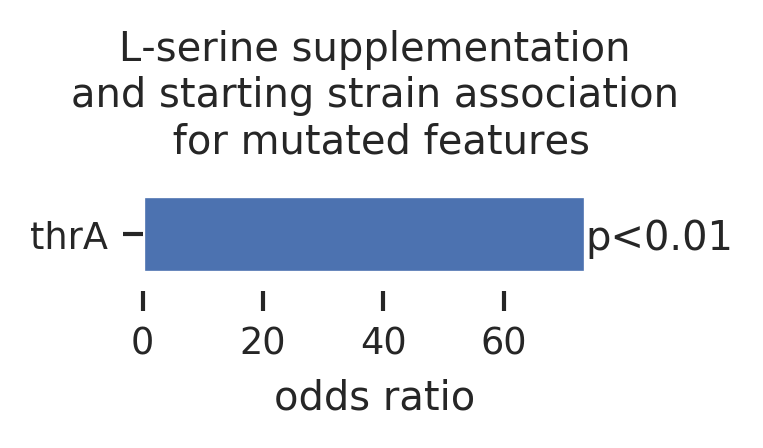

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")


ser_key_mut_feat_df = ser_key_mut_feat_df.sort_values(by="odd ratio")
ax = ser_key_mut_feat_df.plot.barh(
    y="odd ratio",
    x="mutated features",
    color="#4C72B0",
    figsize=(2,0.5),
    width=1
)

ser_key_mut_feat_df = ser_key_mut_feat_df.reset_index()  # Resetting index for the below annotations to work
for i, r in ser_key_mut_feat_df.iterrows():
    s = int(r["odd ratio"])
#     ax.text(r["odd ratio"], i-0.25,  s)    
    s = ""
    if r["p value"] < 0.01: s = "p<0.01"
    else: s = "p=" + '{0:.3f}'.format(r["p value"])
    ax.text(r["odd ratio"], i-0.2,  s)
sns.despine(ax=ax, top=True, right=True, 
            bottom=True,
            left=True)
# ax.set_title("Mutated features\nassociated with L-serine and\nΔsdaA ΔsdaB ΔtdcG ΔglyA")
# ax.set_title("Mutated features\nassociated with L-serine\n and the starting strain")
ax.set_title("L-serine supplementation\nand starting strain association\n for mutated features")
ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel("odds ratio")
plt.savefig("fig.svg", format="svg")